In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [20, 18]

In [337]:
# dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M')
gurgaon = pd.read_csv('Outlet 1.csv', parse_dates=True, index_col='DateTime')
mandawli = pd.read_csv('Outlet 2.csv', parse_dates=True, index_col='DateTime')
ghaziabad = pd.read_csv('Outlet 3.csv', parse_dates=True, index_col='DateTime')
malviya = pd.read_csv('Outlet 4.csv', parse_dates=True, index_col='DateTime')
prem = pd.read_csv('Outlet 5.csv', parse_dates=True, index_col='DateTime')
janakpuri = pd.read_csv('Outlet 6.csv', parse_dates=True, index_col='DateTime')
faridabad = pd.read_csv('Outlet 7.csv', parse_dates=True, index_col='DateTime')
preet = pd.read_csv('Outlet 8.csv', parse_dates=True, index_col='DateTime')
noida = pd.read_csv('Outlet 9.csv', parse_dates=True, index_col='DateTime')
lajpat = pd.read_csv('Outlet 10.csv', parse_dates=True, index_col='DateTime')

## Let's see how people use their AC in NCR

In [338]:
gurgaon_r = gurgaon.resample(rule='D', convention='last').mean()
mandawli_r = mandawli.resample(rule='D', convention='last').mean()
ghaziabad_r = ghaziabad.resample(rule='D', convention='last').mean()
malviya_r = malviya.resample(rule='D', convention='last').mean()
prem_r = prem.resample(rule='D', convention='last').mean()
janakpuri_r = janakpuri.resample(rule='D', convention='last').mean()
faridabad_r = faridabad.resample(rule='D', convention='last').mean()
preet_r = preet.resample(rule='D', convention='last').mean()
noida_r = noida.resample(rule='D', convention='last').mean()
lajpat_r = lajpat.resample(rule='D', convention='last').mean()

Text(0.5,1,'Lajpat Nagar')

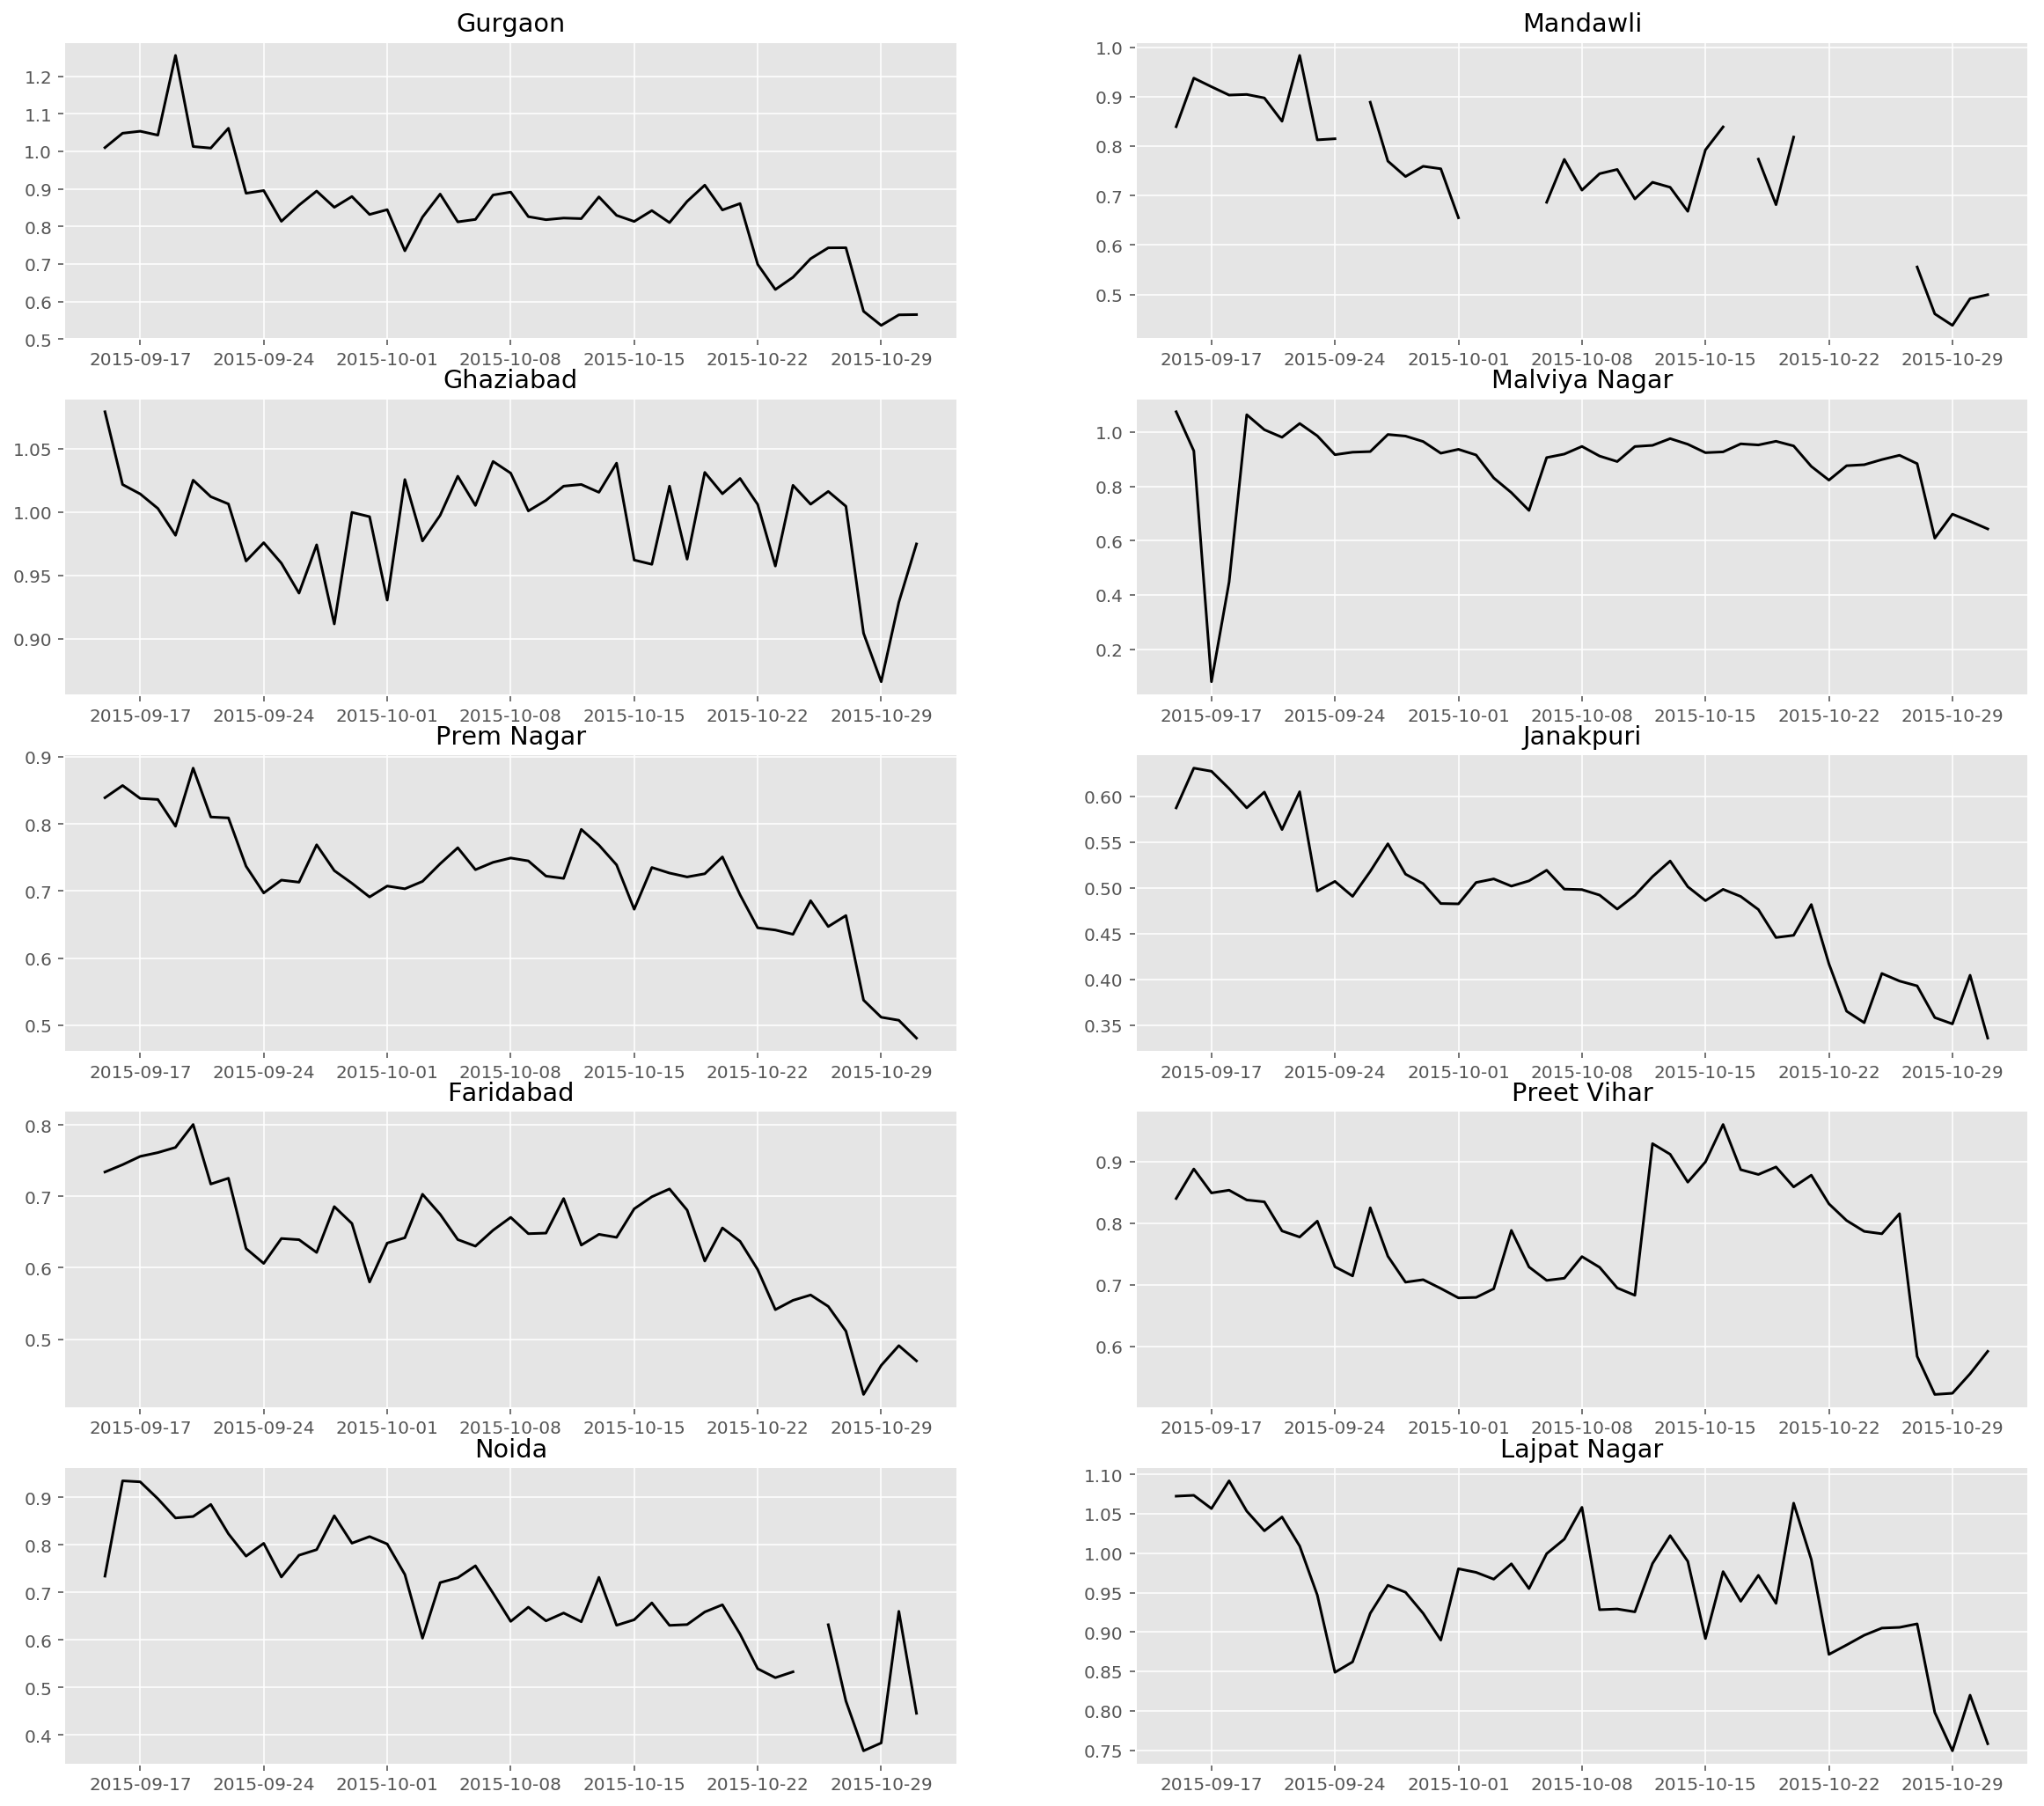

In [339]:
plt.figure(1)
plt.subplot(521)
plt.plot(gurgaon_r, color='black')
plt.title('Gurgaon')
plt.subplot(522)
plt.plot(mandawli_r, color='black')
plt.title('Mandawli')
plt.subplot(523)
plt.plot(ghaziabad_r, color='black')
plt.title('Ghaziabad')
plt.subplot(524)
plt.plot(malviya_r, color='black')
plt.title('Malviya Nagar')
plt.subplot(525)
plt.plot(prem_r, color='black')
plt.title('Prem Nagar')
plt.subplot(526)
plt.plot(janakpuri_r, color='black')
plt.title('Janakpuri')
plt.subplot(527)
plt.plot(faridabad_r, color='black')
plt.title('Faridabad')
plt.subplot(528)
plt.plot(preet_r, color='black')
plt.title('Preet Vihar')
plt.subplot(529)
plt.plot(noida_r, color='black')
plt.title('Noida')
plt.subplot(5, 2, 10)
plt.plot(lajpat_r, color='black')
plt.title('Lajpat Nagar')

Here we can see almost all the places there is a decresing trend in terms of AC consumption although **Malviya Nagar** shows a bit different trend. But the overall trend is obvious because as the winter progresses, people may need lesser AC.

## Lets see if there is any relation between these timeseies in major locations

Naturally these timeseries should show high correlation because these places are nearby and hence climate and temparature would also be similar to drive the AC consumptions

In [340]:
data = janakpuri_r.join(
    faridabad_r.join(malviya_r.join(gurgaon_r.join(noida_r, how='inner'), how='inner'), how='inner'), 
    how='inner')
data.dropna(inplace=True)

Text(0.5,1,'Correlation of Power in few locations')

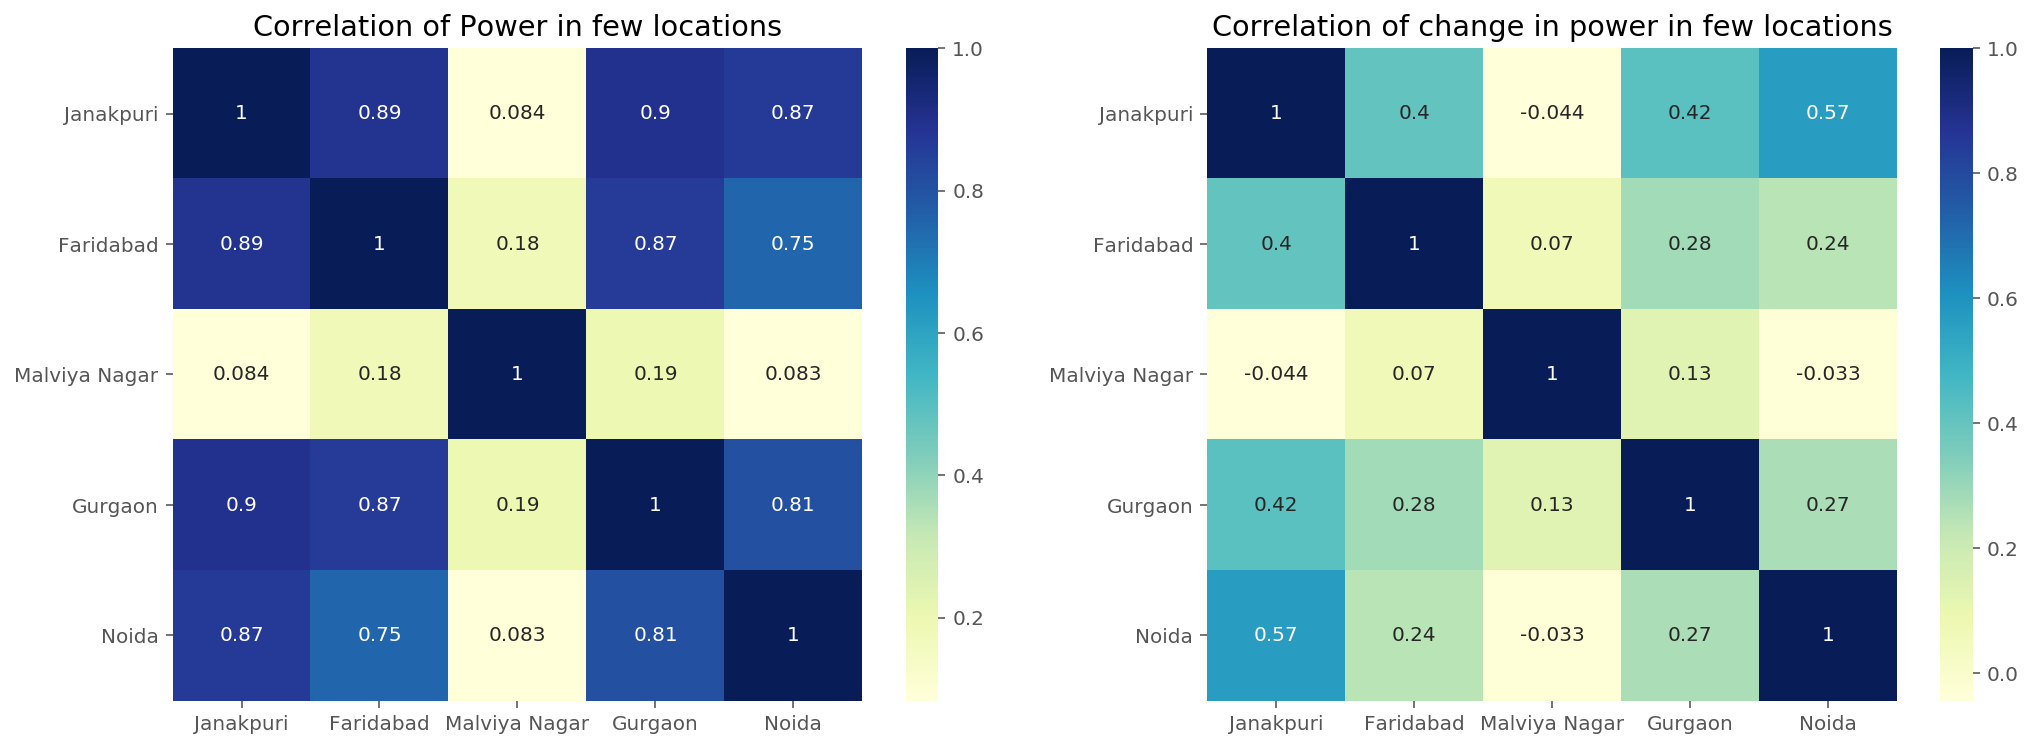

In [341]:
data.columns = ['Janakpuri', 'Faridabad', 'Malviya Nagar', 'Gurgaon', 'Noida']
plt.rcParams['figure.figsize'] = [17, 6]
corr = data.pct_change().corr()
plt.subplot(122)
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation of change in power in few locations')
plt.subplot(121)
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation of Power in few locations')

We can see that even though the power usage in most of these locations are highly correlated, the change in power shows a lesser trend or relation. However **Noida** and **Janakpuri** seems to be highly correlated. Lets see if any other places of high correlations

In [342]:
data = lajpat_r.join(preet_r.join(prem_r.join(ghaziabad_r.join(data.join(mandawli_r, how='inner'), how='inner'),
            how='inner'), how='inner'), how='inner')
data.columns = [
    'Lajpat Nagar',
    'Preet Vihar',
    'Prem Nagar',
    'Ghaziabad',
    'Janakpuri',
    'Faridabad',
    'Malviya Nagar',
    'Gurgaon',
    'Noida',
    'Mandawli'
]

In [343]:
corr = data.pct_change().corr()
corr[corr >= 0.5].fillna('')

,Lajpat Nagar,Preet Vihar,Prem Nagar,Ghaziabad,Janakpuri,Faridabad,Malviya Nagar,Gurgaon,Noida,Mandawli
Lajpat Nagar,1,,0.597962,,,,,,,
Preet Vihar,,1,,,,,,,,
Prem Nagar,0.597962,,1,,,,,,,
Ghaziabad,,,,1,,,,,,
Janakpuri,,,,,1,,,,0.56859,
Faridabad,,,,,,1,,,,
Malviya Nagar,,,,,,,1,,,
Gurgaon,,,,,,,,1,,
Noida,,,,,0.56859,,,,1,
Mandawli,,,,,,,,,,1


We can see that apart from **Noida-Janakpuri**, **Prem Nagar-Lajpat Nagar** has very high correlation with each other. Let's visualisze these two with someting more acceptable in community, a scatter plot.

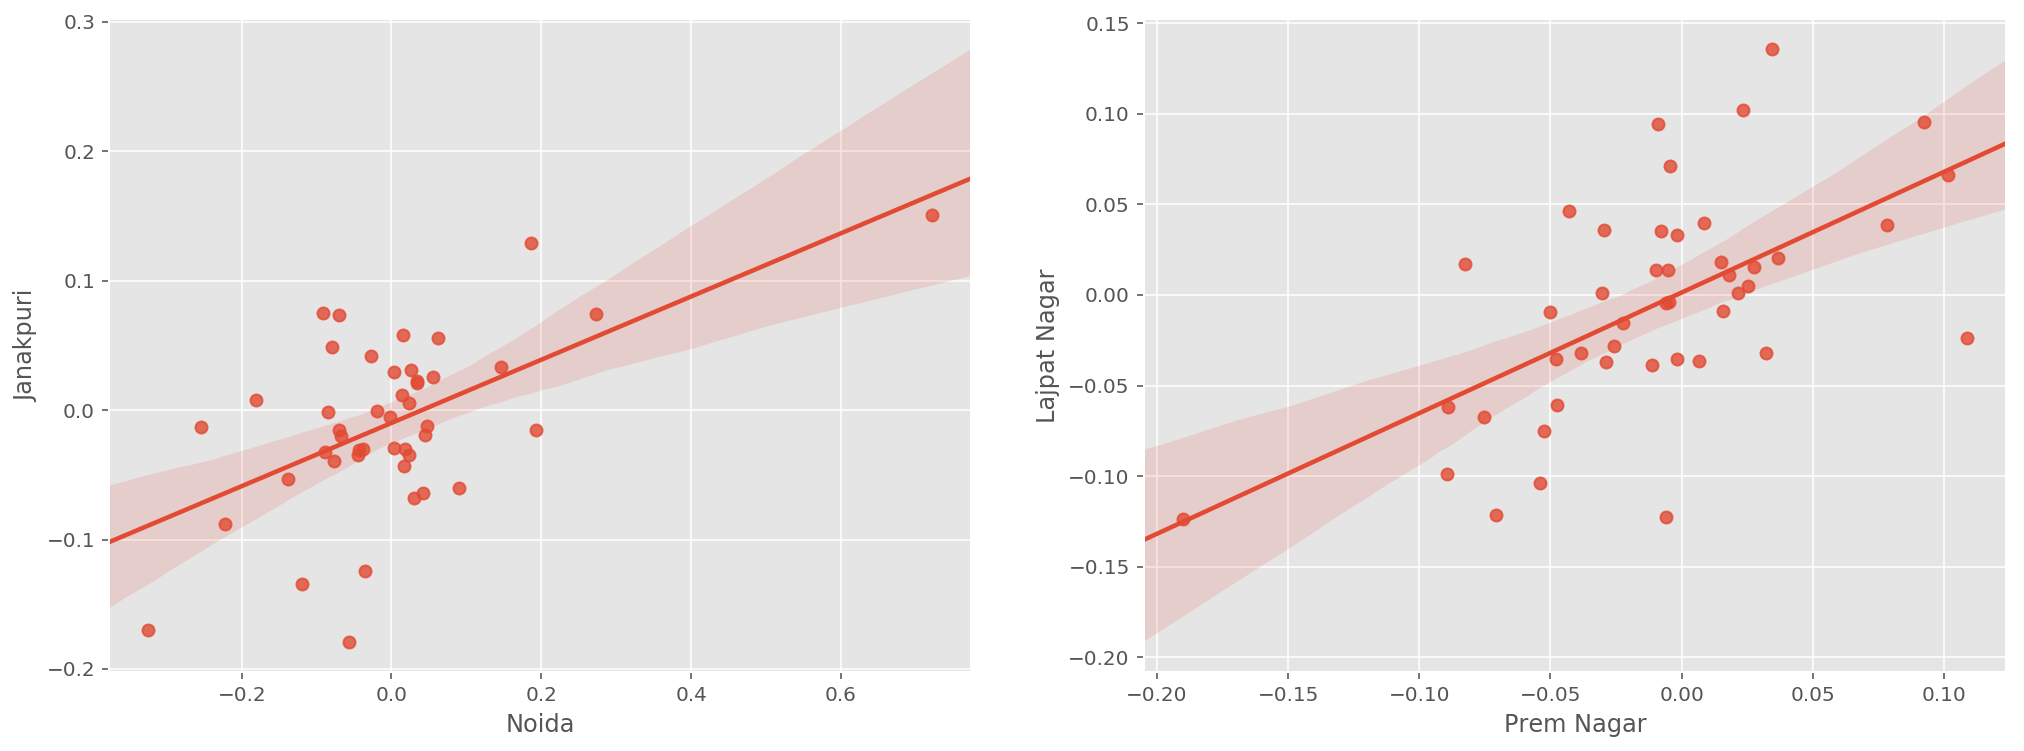

In [344]:
scatter_data = data.pct_change()[['Noida', 'Janakpuri', 'Prem Nagar', 'Lajpat Nagar']]
plt.subplot(121)
# plt.scatter(x=scatter_data.Noida, y=scatter_data.Janakpuri)
sns.regplot(scatter_data.Noida, scatter_data.Janakpuri)
plt.subplot(122)
# plt.scatter(x=scatter_data['Prem Nagar'], y=scatter_data['Lajpat Nagar'])
sns.regplot(scatter_data['Prem Nagar'], scatter_data['Lajpat Nagar'])

We can see a fair amount of correlation between these timeseries. Lets draw some more metrics about these two series.

In [345]:
import statsmodels.api as sm

In [346]:
data = sm.add_constant(scatter_data)
data.dropna(inplace=True)

In [347]:
results = sm.OLS(data['Noida'], data[['const', 'Janakpuri']]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Noida   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     20.54
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           4.60e-05
Time:                        01:25:25   Log-Likelihood:                 29.227
No. Observations:                  45   AIC:                            -54.45
Df Residuals:                      43   BIC:                            -50.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0127      0.019      0.652      0.5

In [348]:
results = sm.OLS(data['Prem Nagar'], data[['const', 'Lajpat Nagar']]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Prem Nagar   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     23.93
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           1.44e-05
Time:                        01:25:26   Log-Likelihood:                 77.930
No. Observations:                  45   AIC:                            -151.9
Df Residuals:                      43   BIC:                            -148.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0077      0.007     -1.169   

## Auto-Correlation of time series

Since all the outlets showed almost similar trend, we would try to analyse one time series with auto-correlation and probably be lucky enough to extend the inference for other outlets. This is also true because most of these are more or less in the same location.

#### Let's take **Gurgaon** as an example

In [349]:
# gurgaon_hourly = gurgaon.resample(rule='H', convention='last').mean()

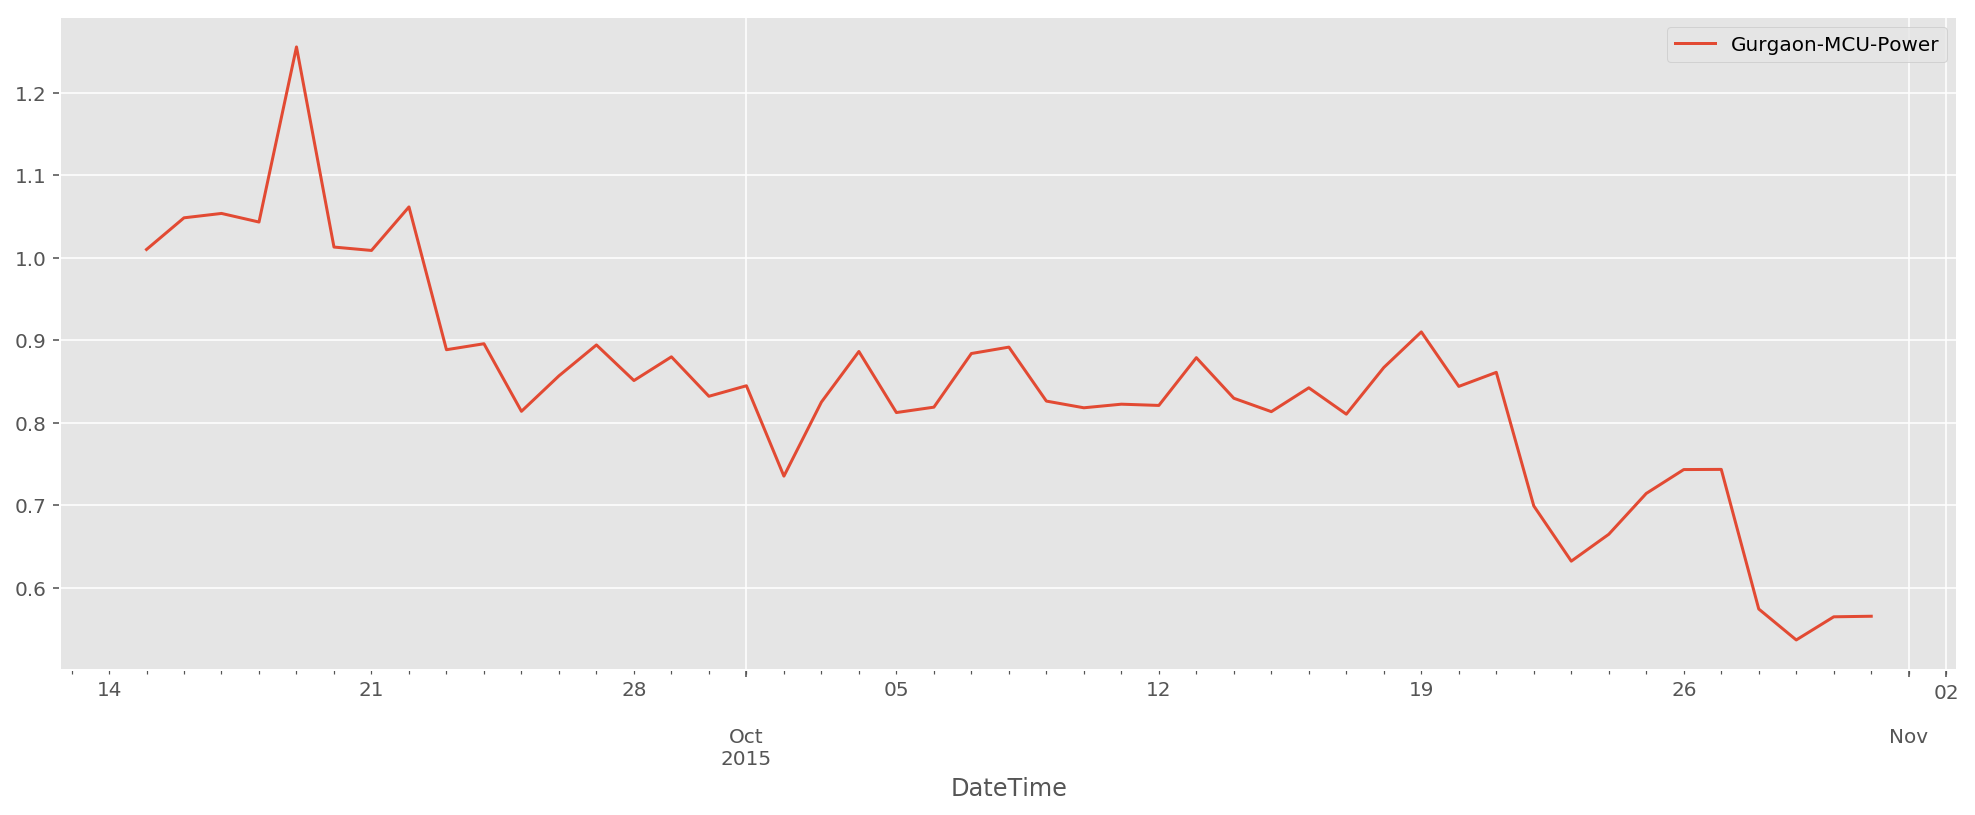

In [350]:
gurgaon_r.plot()

In [351]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

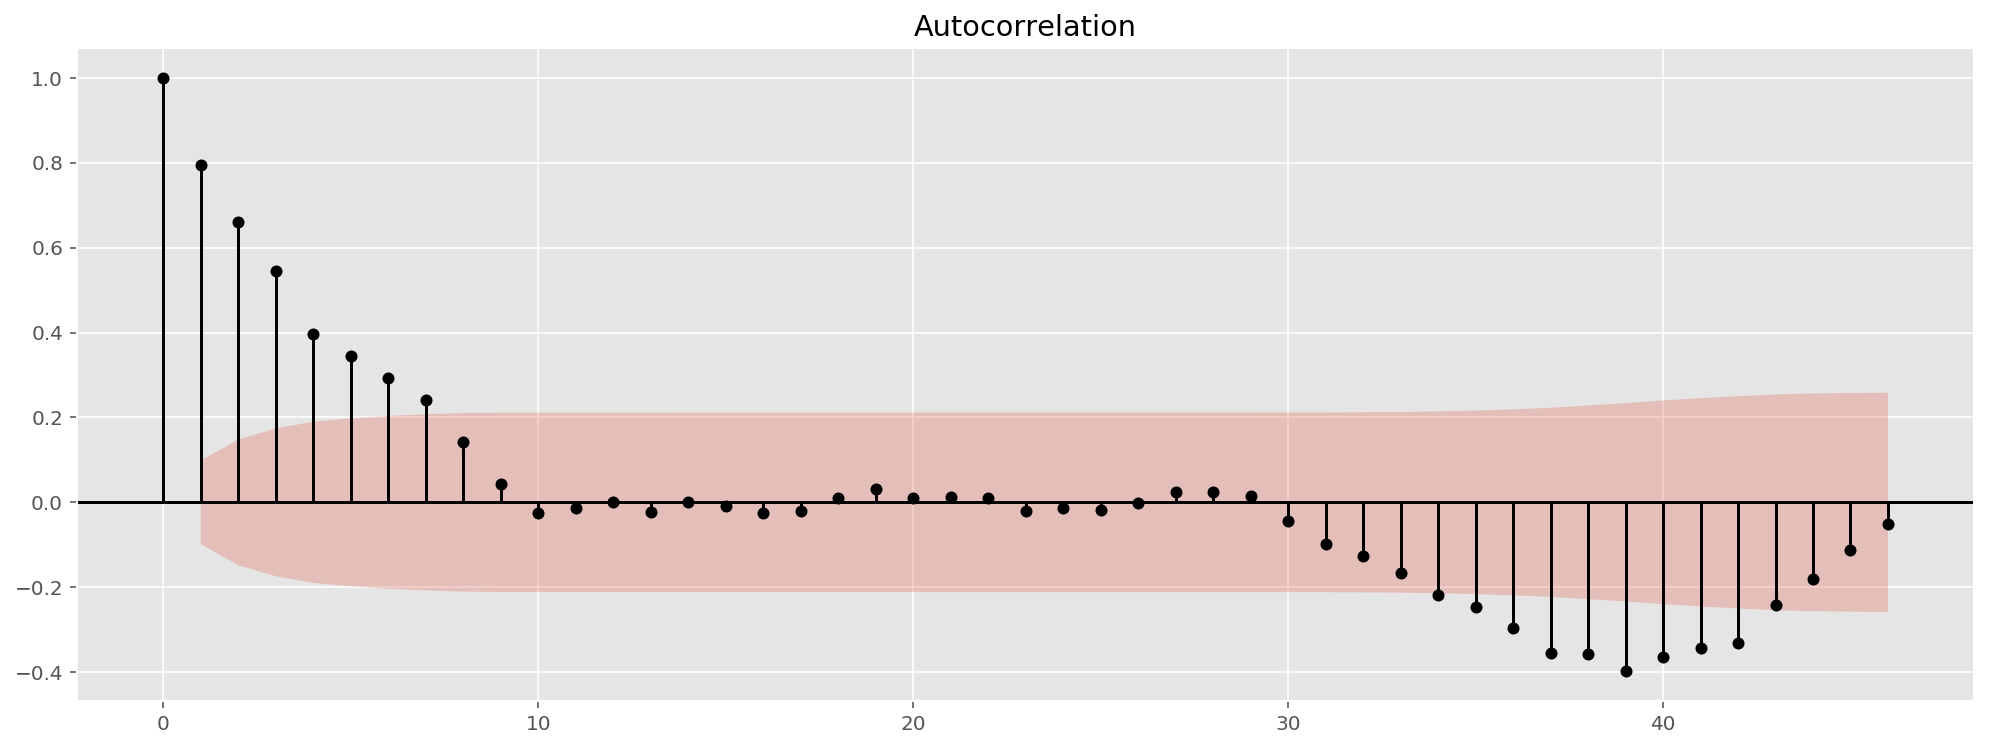

In [352]:
# gurgaon_hourly_acf = acf(gurgaon_hourly['Gurgaon-MCU-Power'])
data = gurgaon_r.dropna()
plot_acf(data, alpha=0.5, color='black')
plt.show()

## Stationary and forecasting

To achieve stationry property we do diff with lag 1 and test how much stationary it is using [**Dickey–Fuller**](https://en.wikipedia.org/wiki/Dickey–Fuller_test) test 

In [353]:
data = np.log(gurgaon_r).diff(1).dropna()

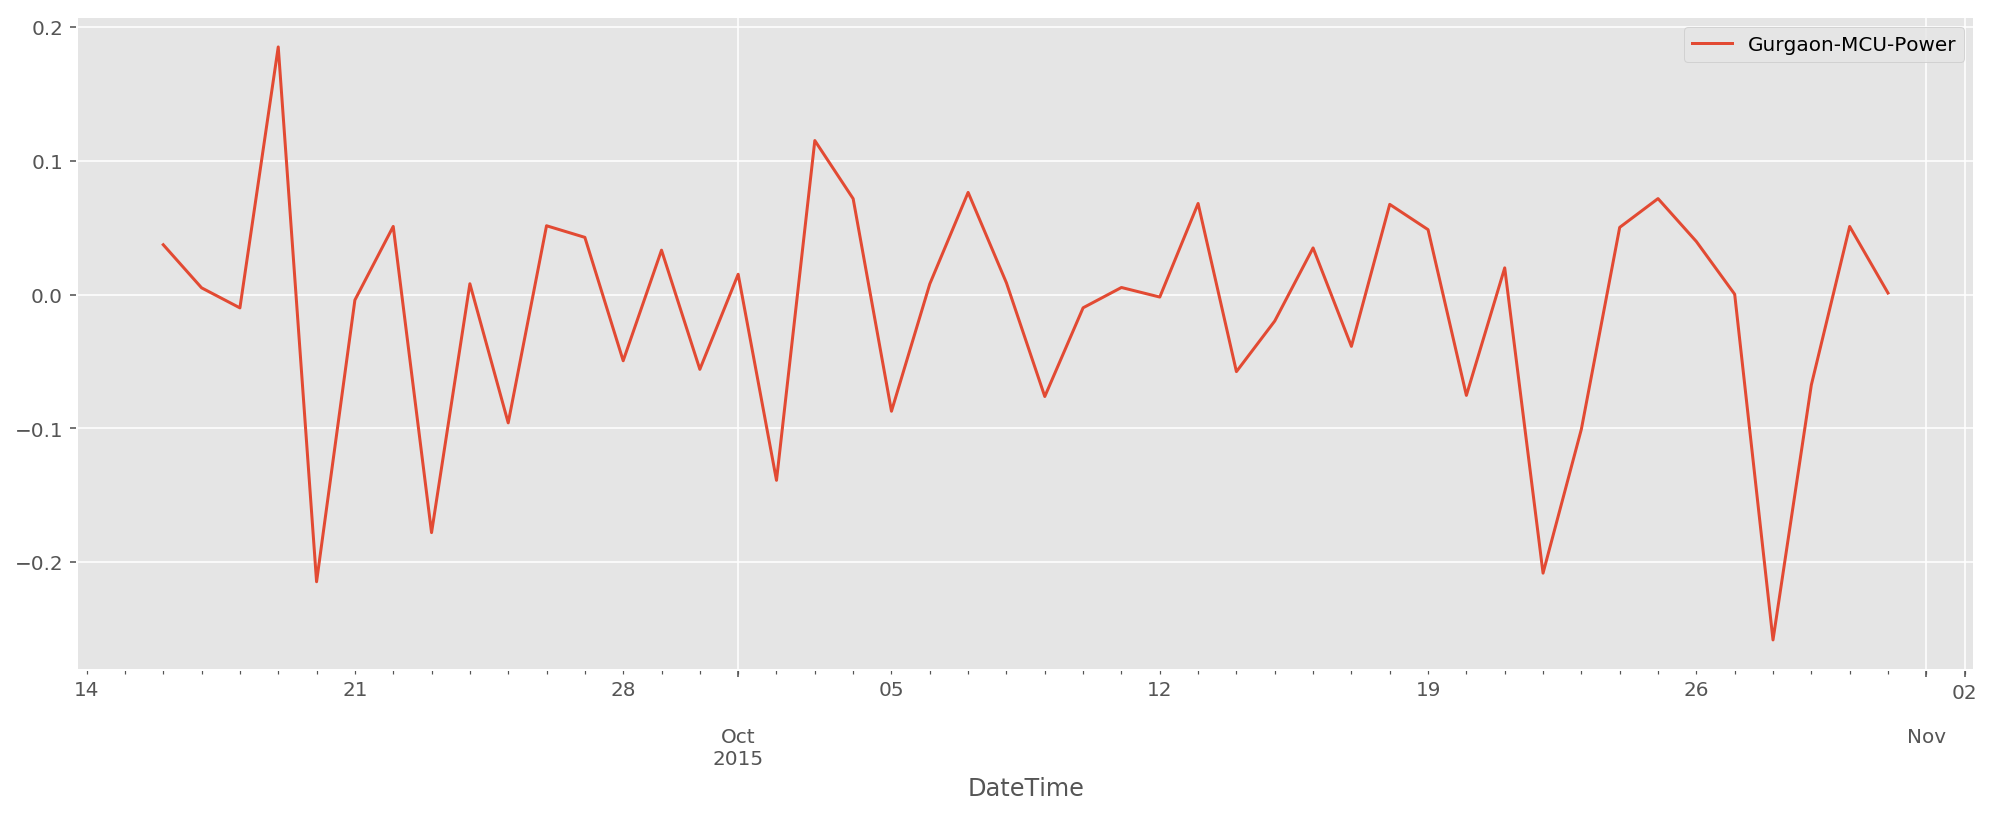

In [354]:
data.plot()

In [355]:
from statsmodels.tsa.stattools import adfuller

In [356]:
res = adfuller(data['Gurgaon-MCU-Power'], autolag='AIC', regression='c')
'p-value is {:.50f}'.format(res[1])

'p-value is 0.00000010696925096561981323691397976691219717793047'

In [357]:
res[4]

{'1%': -3.596635636000432,
 '5%': -2.933297331821618,
 '10%': -2.6049909750566895}

It seems that the p-value is extremely small to recooginise that the series quite stationary for us to do some sort of forecasting using ARIMA model

In [358]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Term for Moving Average

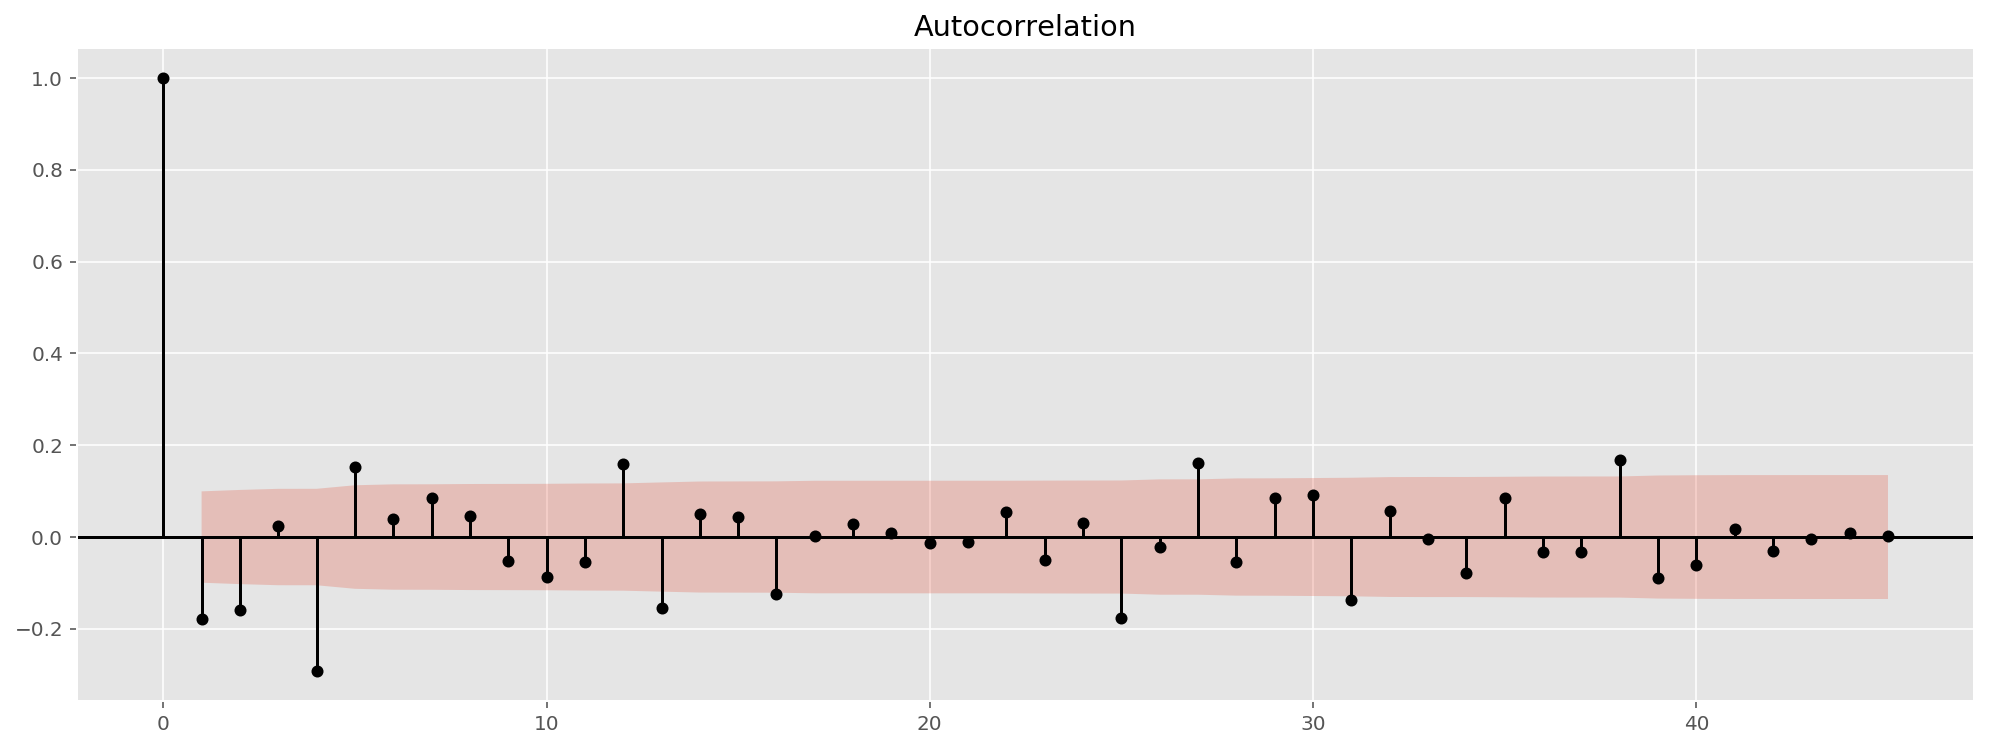

In [359]:
plot_acf(data, alpha=0.5, color='black')
plt.show()

### Term for Auto-Regressive

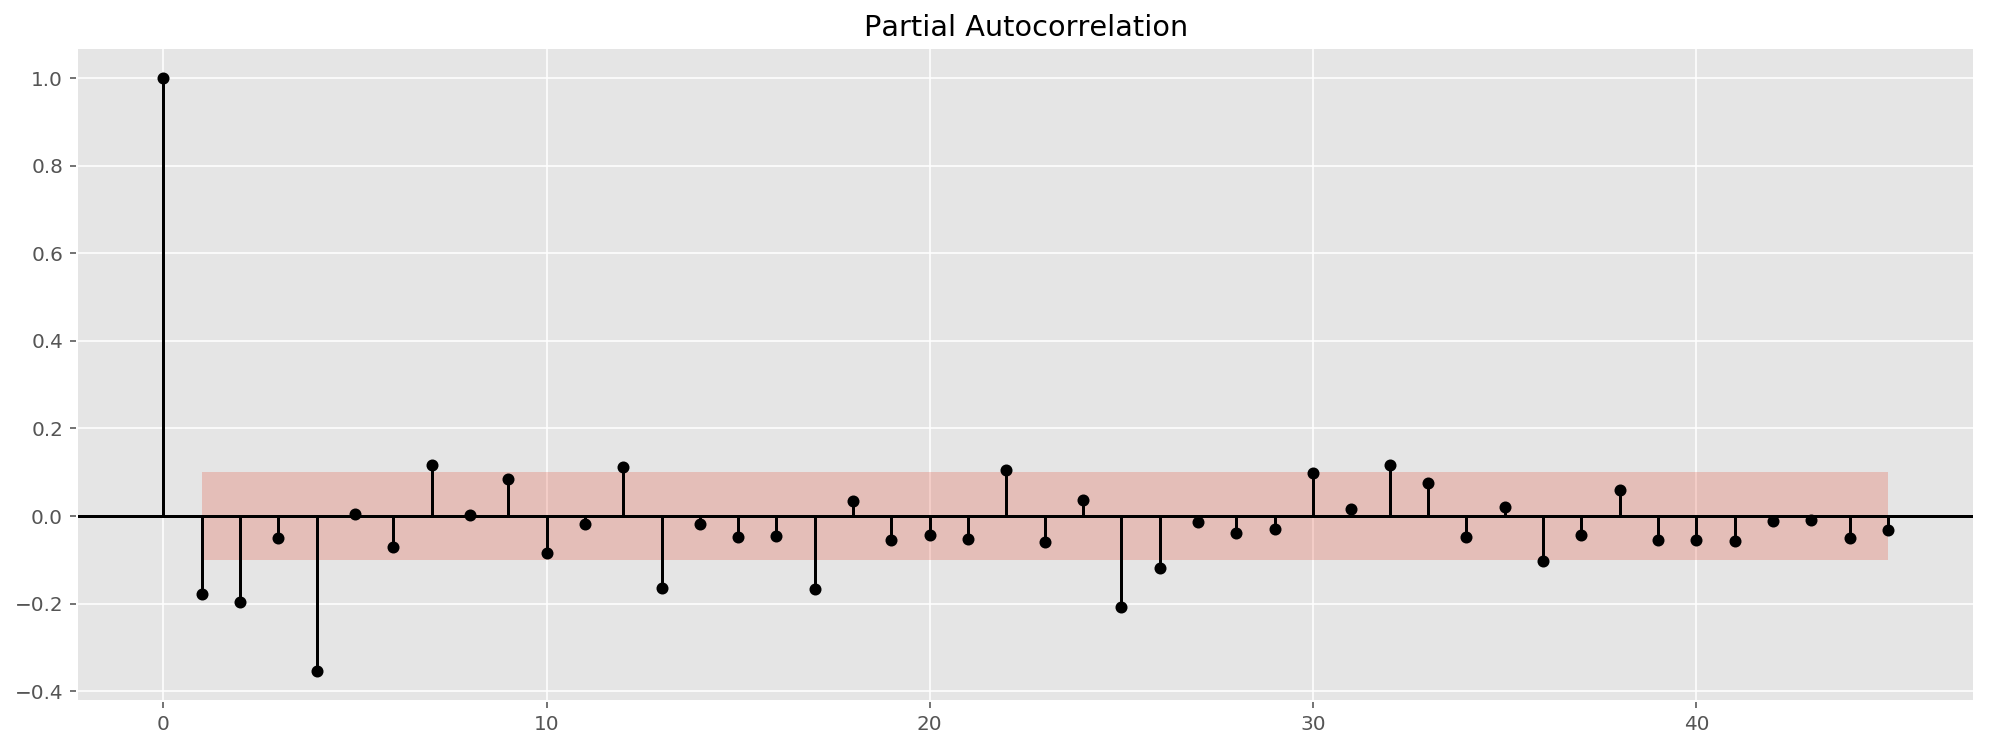

In [360]:
plot_pacf(data, alpha=0.5, color='black')
plt.show()

## The ARIMA model

In [361]:
from statsmodels.tsa.arima_model import ARIMA

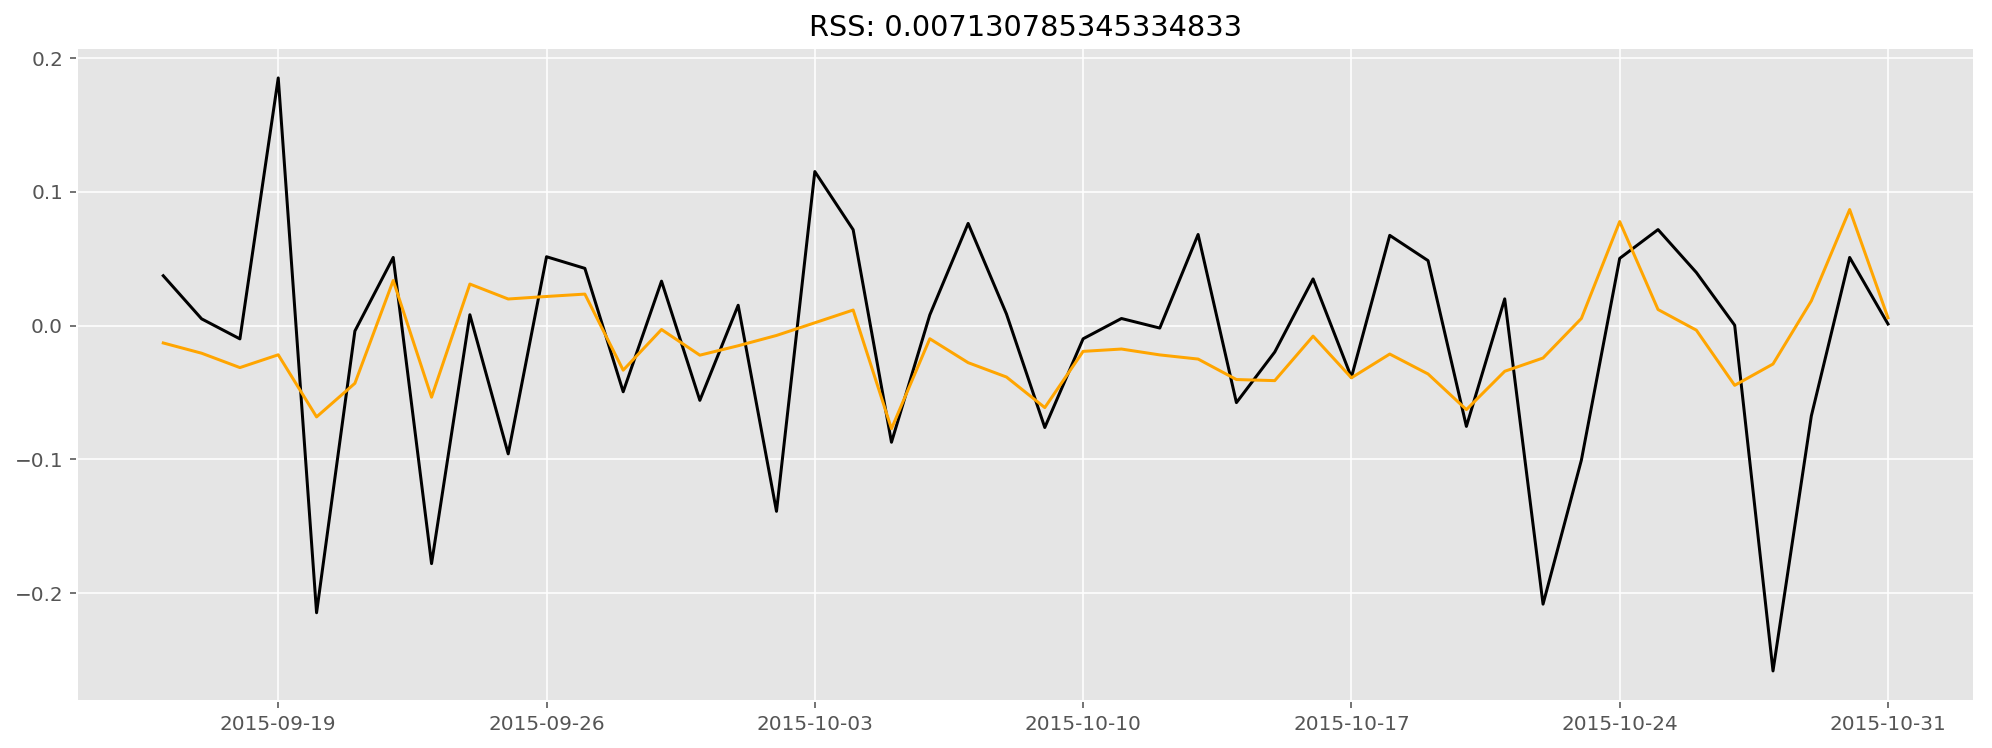

In [362]:
model = ARIMA(data, order=(2, 0, 2))
res = model.fit(disp=-1)
plt.plot(data, color='black')
plt.plot(res.fittedvalues, color='orange')
plt.title('RSS: {}'.format(sum(res.fittedvalues - data['Gurgaon-MCU-Power'])**2))
plt.show()

We are nicely capturing all the trend seen in the data. Although we do have some seasonality pattern but it can be imporoved with seasonal ARIMA. In the above ARIMA we used 0 differentiating value because we are already differenting the dataset. We can also see that RSS error is very small of being just **0.007**.

In [366]:
fdata = res.fittedvalues.reset_index().set_index('DateTime')
fdata.columns = ['Gurgaon']

In [377]:
fdata = np.exp(fdata.diff(-1)).dropna()

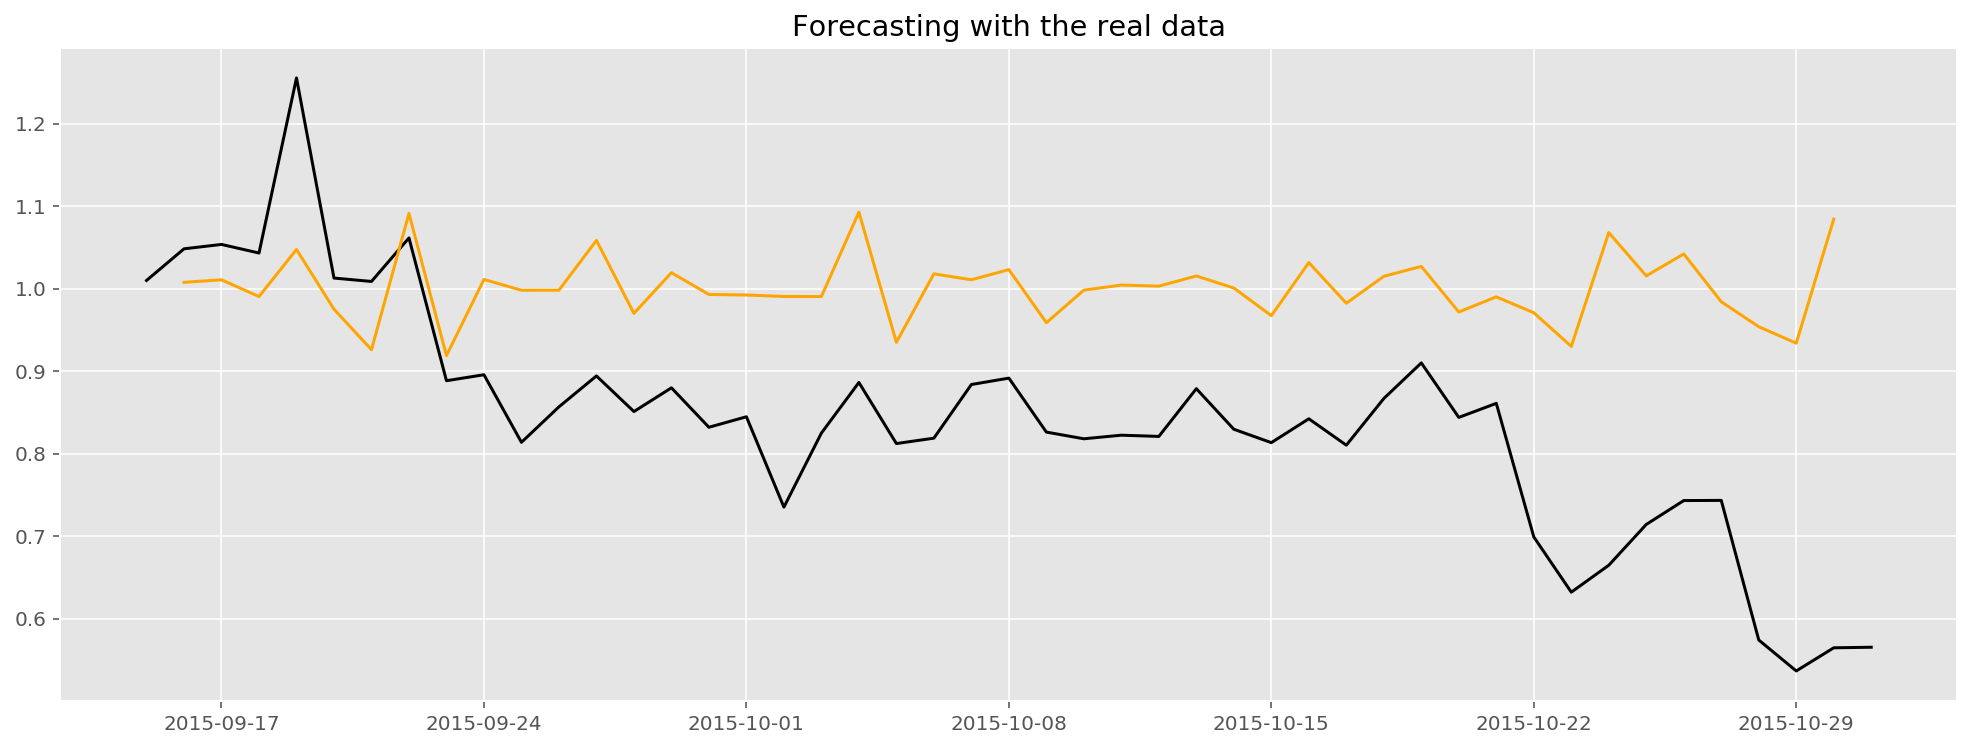

In [380]:
plt.plot(gurgaon_r, color='black')
plt.plot(fdata, color='orange')
plt.title('Forecasting with the real data')
plt.show()

As you can see that as we discussed previously, we are able to catch the trend but we are little bit off in terms of seasonality.